<a href="https://colab.research.google.com/github/Spyke2022/Spyke2022/blob/main/SILASatividade_previa_pos_codigo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Aluno: SILAS DE ALBUQUERQUE FALCÃO
### Matricula: 00430000000CDD0003

## import bibliotecas:

## import database:

In [4]:
import pandas as pd

In [5]:
df_rotas = pd.read_csv("/content/rotas.csv")
df_rotas.head()

,DIRIGIBILIDADE,ROTAS,DISTANCIA,FALHAS,LOMBADAS,ILUMINACAO,SINALIZACAO,PEDAGIOS,POSTOPOLICIAL
0,continuous,string,continuous,continuous,continuous,continuous,continuous,0.0 1.0,discrete
1,class,meta,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,R1,159.0,20.0,16.0,4.0,3.0,1.0,0.0
3,2.0,R2,131.0,3.0,2.0,1.0,6.0,1.0,0.0
4,3.0,R3,141.0,2.0,27.0,3.0,57.0,1.0,0.0


## data wralling:

In [6]:
df_rotas = df_rotas.loc[2:]
df_rotas.head()

,DIRIGIBILIDADE,ROTAS,DISTANCIA,FALHAS,LOMBADAS,ILUMINACAO,SINALIZACAO,PEDAGIOS,POSTOPOLICIAL
2,3.0,R1,159.0,20.0,16.0,4.0,3.0,1.0,0.0
3,2.0,R2,131.0,3.0,2.0,1.0,6.0,1.0,0.0
4,3.0,R3,141.0,2.0,27.0,3.0,57.0,1.0,0.0
5,3.0,R4,269.0,13.0,20.0,1.0,93.0,0.0,0.0
6,2.0,R5,182.0,27.0,10.0,4.0,78.0,1.0,0.0


In [7]:
df_rotas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5119 entries, 2 to 5120
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DIRIGIBILIDADE  5119 non-null   object
 1   ROTAS           5119 non-null   object
 2   DISTANCIA       5119 non-null   object
 3   FALHAS          5119 non-null   object
 4   LOMBADAS        5119 non-null   object
 5   ILUMINACAO      5119 non-null   object
 6   SINALIZACAO     5119 non-null   object
 7   PEDAGIOS        5119 non-null   object
 8   POSTOPOLICIAL   5119 non-null   object
dtypes: object(9)
memory usage: 360.1+ KB


In [8]:
df_rotas['DIRIGIBILIDADE'] = pd.to_numeric(df_rotas['DIRIGIBILIDADE'], errors='coerce')
df_rotas['ROTAS'] = df_rotas['ROTAS'].astype(str)
df_rotas['DISTANCIA'] = pd.to_numeric(df_rotas['DISTANCIA'], errors='coerce')
df_rotas['FALHAS'] = pd.to_numeric(df_rotas['FALHAS'], errors='coerce')
df_rotas['LOMBADAS'] = pd.to_numeric(df_rotas['LOMBADAS'], errors='coerce')
df_rotas['ILUMINACAO'] = pd.to_numeric(df_rotas['ILUMINACAO'], errors='coerce')
df_rotas['SINALIZACAO'] = pd.to_numeric(df_rotas['SINALIZACAO'], errors='coerce')
df_rotas['PEDAGIOS'] = pd.to_numeric(df_rotas['PEDAGIOS'], errors='coerce')
df_rotas['POSTOPOLICIAL'] = pd.to_numeric(df_rotas['POSTOPOLICIAL'], errors='coerce')

In [9]:
df_rotas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5119 entries, 2 to 5120
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DIRIGIBILIDADE  5119 non-null   float64
 1   ROTAS           5119 non-null   object 
 2   DISTANCIA       5119 non-null   float64
 3   FALHAS          5119 non-null   float64
 4   LOMBADAS        5119 non-null   float64
 5   ILUMINACAO      5119 non-null   float64
 6   SINALIZACAO     5119 non-null   float64
 7   PEDAGIOS        5119 non-null   float64
 8   POSTOPOLICIAL   5119 non-null   float64
dtypes: float64(8), object(1)
memory usage: 360.1+ KB


In [10]:
df_rotas.isnull().sum()

DIRIGIBILIDADE    0
ROTAS             0
DISTANCIA         0
FALHAS            0
LOMBADAS          0
ILUMINACAO        0
SINALIZACAO       0
PEDAGIOS          0
POSTOPOLICIAL     0
dtype: int64

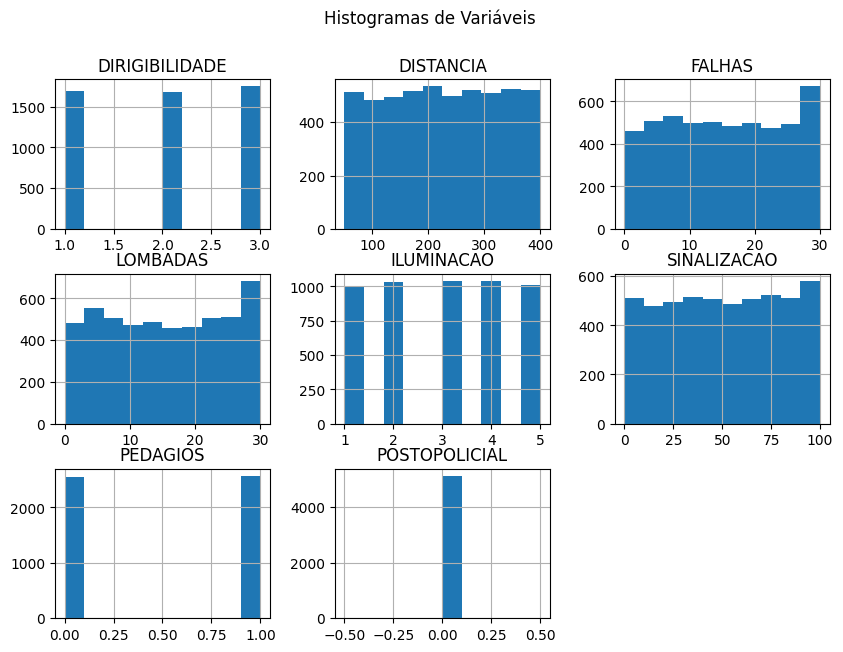

In [11]:
import matplotlib.pyplot as plt

df_rotas.hist(bins=10, figsize=(10, 7))
plt.suptitle("Histogramas de Variáveis")
plt.show()

In [12]:
df_rotas.drop(['POSTOPOLICIAL'], axis=1, inplace=True)

## Tipos de Características:

| Variável         | Classificação   | Tipo         | Status      |
|------------------|----------------- |--------------|-------------|
| DIRIGIBILIDADE   | Target           | Categórica   | ok          |
| DISTÂNCIA        | Feature          | Contínua     | ok          |
| FALHAS           | Feature          | Contínua     | ok          |
| LOMBADAS         | Feature          | Contínua     | ok          |
| ILUMINAÇÃO       | Feature          | Categórica   | ok          |
| SINALIZAÇÃO      | Feature          | Contínua     | ok          |
| PEDÁGIOS         | Feature          | Categórica   | ok          |
| POSTO POLICIAL   | Feature          | Categórica   | Categórica  |  

## Analise Exploratoria:

In [13]:
#top maior:
top_size = 5
for coluna_dataframe in ['DISTANCIA', 'FALHAS', 'LOMBADAS', 'SINALIZACAO']:
    top_rotas = df_rotas.sort_values([coluna_dataframe], ascending=False).head(top_size).to_dict().get("ROTAS").values()
    top_values = df_rotas.sort_values([coluna_dataframe], ascending=False).head(top_size).to_dict().get(f"{coluna_dataframe}").values()

    print(f"ROTAS COM MAIORES: {coluna_dataframe}: ", dict(zip(top_rotas, top_values)))

ROTAS COM MAIORES: DISTANCIA:  {'R3229': 400.0, 'R2069': 400.0, 'R4763': 400.0, 'R1492': 400.0, 'R398': 400.0}
ROTAS COM MAIORES: FALHAS:  {'R2757': 30.0, 'R3027': 30.0, 'R708': 30.0, 'R707': 30.0, 'R694': 30.0}
ROTAS COM MAIORES: LOMBADAS:  {'R1191': 30.0, 'R3735': 30.0, 'R243': 30.0, 'R3576': 30.0, 'R3583': 30.0}
ROTAS COM MAIORES: SINALIZACAO:  {'R3090': 100.0, 'R4303': 100.0, 'R1276': 100.0, 'R981': 100.0, 'R1226': 100.0}


In [14]:
#top menor:
top_size = 5
for coluna_dataframe in ['DISTANCIA', 'FALHAS', 'LOMBADAS', 'SINALIZACAO']:
    top_rotas = df_rotas.sort_values([coluna_dataframe], ascending=True).head(top_size).to_dict().get("ROTAS").values()
    top_values = df_rotas.sort_values([coluna_dataframe], ascending=True).head(top_size).to_dict().get(f"{coluna_dataframe}").values()

    print(f"ROTAS COM MENORES: {coluna_dataframe}: ", dict(zip(top_rotas, top_values)))

ROTAS COM MENORES: DISTANCIA:  {'R3363': 50.0, 'R5060': 50.0, 'R2469': 50.0, 'R4430': 50.0, 'R3813': 50.0}
ROTAS COM MENORES: FALHAS:  {'R3243': 0.0, 'R2778': 0.0, 'R1911': 0.0, 'R4805': 0.0, 'R2745': 0.0}
ROTAS COM MENORES: LOMBADAS:  {'R3085': 0.0, 'R3556': 0.0, 'R4678': 0.0, 'R4683': 0.0, 'R3171': 0.0}
ROTAS COM MENORES: SINALIZACAO:  {'R2560': 0.0, 'R3856': 0.0, 'R3815': 0.0, 'R3792': 0.0, 'R3774': 0.0}


## Aplicando MinMaxScaler:

In [15]:
from sklearn.preprocessing import MinMaxScaler

# removendo coluna rotas pois é uma string:
df_rotas_colunas_numericas = df_rotas.drop(["ROTAS"], axis=1)

# aplicando min_max_scaler:
scaler = MinMaxScaler(feature_range=(0, 1))
df_normalized = pd.DataFrame(scaler.fit_transform(df_rotas_colunas_numericas), columns=df_rotas_colunas_numericas.columns)

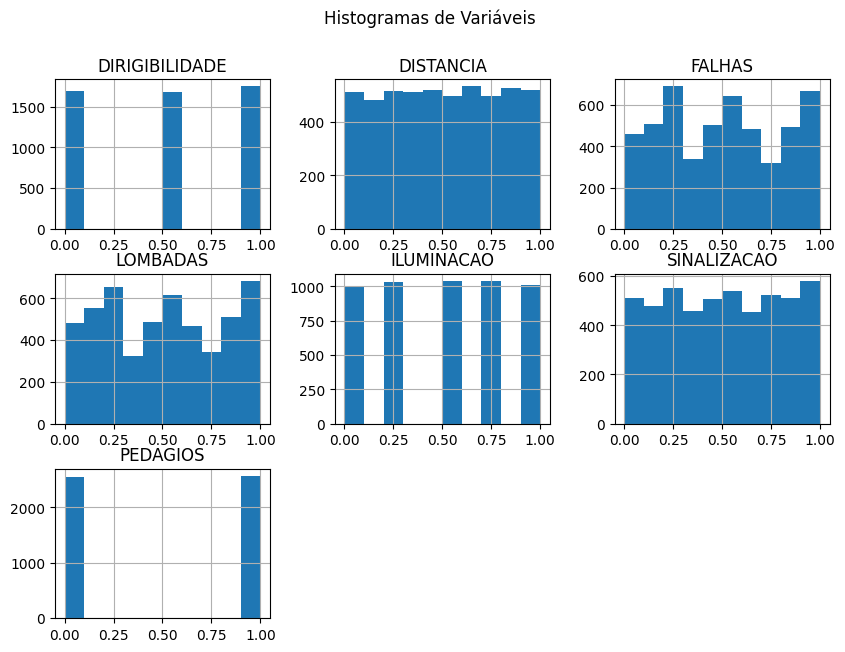

In [16]:
df_normalized.hist(bins=10, figsize=(10, 7))
plt.suptitle("Histogramas de Variáveis")
plt.show()

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Treinar o modelo K-Means
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(df_normalized)

KMeans(n_clusters=3, n_init=10, random_state=42)

In [18]:
df_rotas['CLUSTER'] = kmeans.labels_

In [19]:
df_rotas.head()

,DIRIGIBILIDADE,ROTAS,DISTANCIA,FALHAS,LOMBADAS,ILUMINACAO,SINALIZACAO,PEDAGIOS,CLUSTER
2,3.0,R1,159.0,20.0,16.0,4.0,3.0,1.0,0
3,2.0,R2,131.0,3.0,2.0,1.0,6.0,1.0,1
4,3.0,R3,141.0,2.0,27.0,3.0,57.0,1.0,0
5,3.0,R4,269.0,13.0,20.0,1.0,93.0,0.0,2
6,2.0,R5,182.0,27.0,10.0,4.0,78.0,1.0,1


In [20]:
import seaborn as sns

In [21]:
df_rotas.head()

,DIRIGIBILIDADE,ROTAS,DISTANCIA,FALHAS,LOMBADAS,ILUMINACAO,SINALIZACAO,PEDAGIOS,CLUSTER
2,3.0,R1,159.0,20.0,16.0,4.0,3.0,1.0,0
3,2.0,R2,131.0,3.0,2.0,1.0,6.0,1.0,1
4,3.0,R3,141.0,2.0,27.0,3.0,57.0,1.0,0
5,3.0,R4,269.0,13.0,20.0,1.0,93.0,0.0,2
6,2.0,R5,182.0,27.0,10.0,4.0,78.0,1.0,1


In [22]:
df_filtered_cluster_0 = df_rotas[df_rotas['CLUSTER'] == 0]
df_filtered_cluster_1 = df_rotas[df_rotas['CLUSTER'] == 1]
df_filtered_cluster_2 = df_rotas[df_rotas['CLUSTER'] == 2]

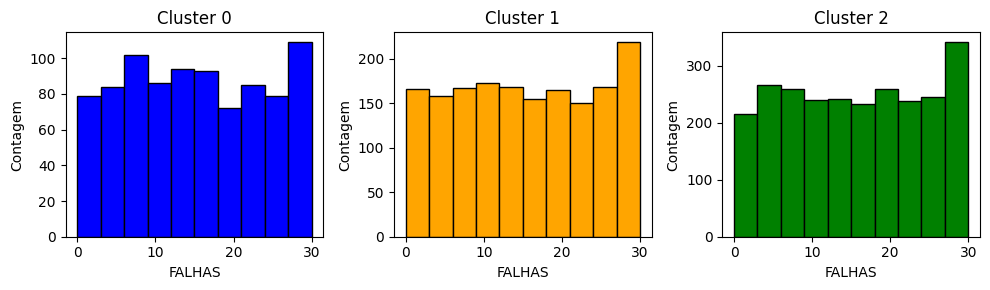

In [23]:

# Criar um subplot de 3 histogramas
plt.figure(figsize=(10, 3))

# Histograma para o Cluster 0
plt.subplot(1, 3, 1)
plt.hist(df_filtered_cluster_0['FALHAS'], bins=10, color='blue', edgecolor='black')
plt.title('Cluster 0')
plt.xlabel('FALHAS')
plt.ylabel('Contagem')

# Histograma para o Cluster 1
plt.subplot(1, 3, 2)
plt.hist(df_filtered_cluster_1['FALHAS'], bins=10, color='orange', edgecolor='black')
plt.title('Cluster 1')
plt.xlabel('FALHAS')
plt.ylabel('Contagem')

# Histograma para o Cluster 2
plt.subplot(1, 3, 3)
plt.hist(df_filtered_cluster_2['FALHAS'], bins=10, color='green', edgecolor='black')
plt.title('Cluster 2')
plt.xlabel('FALHAS')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

In [24]:
tabela_pivot = pd.pivot_table(df_rotas, values=["FALHAS"],  index='CLUSTER', aggfunc='sum')
tabela_pivot = tabela_pivot.reset_index()

In [25]:
tabela_pivot

,CLUSTER,FALHAS
0,0,13007.0
1,1,25288.0
2,2,38537.0


In [28]:
import plotly.express as px

In [29]:
fig = px.bar(tabela_pivot, x='CLUSTER', y='FALHAS', color='CLUSTER',
             labels={'CLUSTER': 'Cluster', 'FALHAS': 'Quantidade de FALHAS'},
             title='Quantidade de FALHAS por Cluster - Plotly',
             color_discrete_map={0: 'blue', 1: 'orange', 2: 'green'})

fig.update_layout(template='plotly_dark', height=500, width=800)
fig.update_coloraxes(showscale=False)

fig.show()

In [33]:
perigo_rota = {0: 'BAIXO', 1: 'ALTO', 2: 'MODERADO'}
df_rotas['PERIGO'] = df_rotas['CLUSTER'].map(perigo_rota)

In [34]:
df_rotas.head()

,DIRIGIBILIDADE,ROTAS,DISTANCIA,FALHAS,LOMBADAS,ILUMINACAO,SINALIZACAO,PEDAGIOS,CLUSTER,PERIGO
2,3.0,R1,159.0,20.0,16.0,4.0,3.0,1.0,0,BAIXO
3,2.0,R2,131.0,3.0,2.0,1.0,6.0,1.0,1,ALTO
4,3.0,R3,141.0,2.0,27.0,3.0,57.0,1.0,0,BAIXO
5,3.0,R4,269.0,13.0,20.0,1.0,93.0,0.0,2,MODERADO
6,2.0,R5,182.0,27.0,10.0,4.0,78.0,1.0,1,ALTO


from matplotlib import pyplot as plt
_df_0['DIRIGIBILIDADE'].plot(kind='hist', bins=20, title='DIRIGIBILIDADE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['DISTANCIA'].plot(kind='hist', bins=20, title='DISTANCIA')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['FALHAS'].plot(kind='hist', bins=20, title='FALHAS')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['LOMBADAS'].plot(kind='hist', bins=20, title='LOMBADAS')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('ROTAS').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('PERIGO').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='DIRIGIBILIDADE', y='DISTANCIA', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='DISTANCIA', y='FALHAS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='FALHAS', y='LOMBADAS', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='LOMBADAS', y='ILUMINACAO', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10['DIRIGIBILIDADE'].plot(kind='line', figsize=(8, 4), title='DIRIGIBILIDADE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['DISTANCIA'].plot(kind='line', figsize=(8, 4), title='DISTANCIA')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_12['FALHAS'].plot(kind='line', figsize=(8, 4), title='FALHAS')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['LOMBADAS'].plot(kind='line', figsize=(8, 4), title='LOMBADAS')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['PERIGO'].value_counts()
    for x_label, grp in _df_14.groupby('ROTAS')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('ROTAS')
_ = plt.ylabel('PERIGO')

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['ROTAS'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='DIRIGIBILIDADE', y='ROTAS', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['PERIGO'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='DIRIGIBILIDADE', y='PERIGO', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['ROTAS'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='DISTANCIA', y='ROTAS', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['PERIGO'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='DISTANCIA', y='PERIGO', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-36-52ad94d35359>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




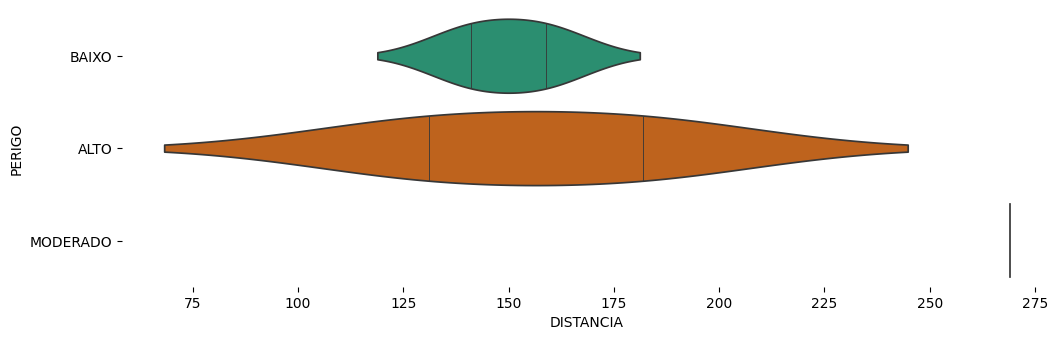

In [36]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['PERIGO'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='DISTANCIA', y='PERIGO', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

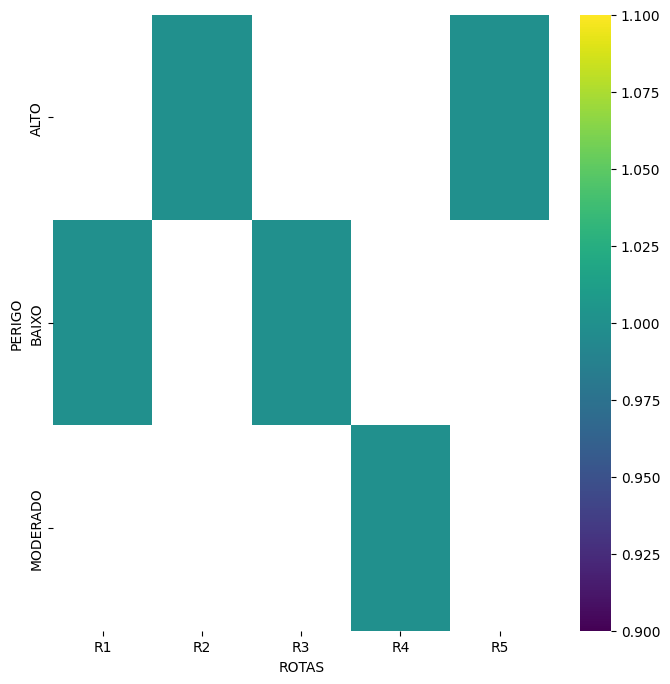

In [35]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['PERIGO'].value_counts()
    for x_label, grp in _df_14.groupby('ROTAS')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('ROTAS')
_ = plt.ylabel('PERIGO')

---

Ao explorar os dados fornecidos, podemos obter insights valiosos sobre as características das rotas, como distância, falhas, lombadas e sinalização. Aqui estão algumas análises possíveis:

#### Rotas com Maiores Distâncias:
- As rotas têm uma distância máxima de 400.0.
- Seria interessante investigar se há uma tendência de aumento da distância em determinadas regiões ou condições geográficas.

#### Rotas com Maiores Falhas:
- As rotas com maiores falhas têm um máximo de 30.0.
- Uma análise mais aprofundada poderia identificar as causas específicas dessas falhas e se existe algum padrão geográfico ou temporal associado.

#### Rotas com Maiores Lombadas:
- As rotas com maiores lombadas também apresentam um máximo de 30.0 lombadas.
- Uma análise adicional poderia revelar se a presença de lombadas está relacionada a áreas específicas ou condições de infraestrutura.

#### Rotas com Maior Sinalização:
- As rotas com maior sinalização têm um máximo de 100.0.
- Uma investigação mais detalhada pode revelar se a alta sinalização está associada a áreas urbanas, interseções complexas ou condições especiais de tráfego.

#### Rotas com Menores Distâncias, Falhas, Lombadas e Sinalização:
- Indicam áreas onde as condições são geralmente melhores.
- Uma comparação espacial dessas rotas em relação às rotas com maiores valores pode identificar padrões ou áreas específicas que oferecem melhores condições.

#### Rotas com Menores ou Nulas Falhas, Lombadas e Sinalização:
- Podem indicar áreas com boa infraestrutura e segurança viária.
- Seria interessante analisar se essas rotas estão localizadas em áreas urbanas, suburbanas ou rurais.